<a href="https://colab.research.google.com/github/nikishkaaa/ML-Course/blob/main/HW_2_1_%D0%90%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA_%D0%B4%D0%BB%D1%8F_%D0%BF%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B8_%D0%BB%D1%96%D0%BD%D1%96%D0%B8%CC%86%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [25]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls 'drive/MyDrive/ML Course'

application_data.csv.zip  application_data_processed.zip  medical-charges.csv


In [14]:
df = pd.read_csv("drive/MyDrive/ML Course/medical-charges.csv")

In [15]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Ідеї:
- побудувати скатер плот та підібрати коефіцієнти для лінії, яка б найбільш тояно описує розподіл даних
- знайти кореляцію колонок
- медіана

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [8]:
fig = px.histogram(df, x="charges", color="sex", marginal="box",
                         hover_data=df.columns)
fig.show()

Розподіл як для чоловіків, так і для жінок не рівномірний.
В основномм чоловіки платять більше, ніж жінки

In [9]:
fig = px.histogram(df, x="charges", color="region", marginal="box",
                         hover_data=df.columns)
fig.show()

Розподіл даних не рівномірний. В основному більше платять люди, які проживають в northwest.

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [16]:
fig = px.histogram(df, x="region", color="smoker")
fig.show()

Бачимо, що к-ть курців по регіонам має майже однакову відсоткову частку серез усіх людей

In [18]:
fig = px.histogram(df, x="children", color="smoker", marginal="box",
                         hover_data=df.columns)
fig.show()

Бачимо, що відсотковий розподіл курців для людей з різноюж к-тю дітей майже однакова.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [19]:
fig = px.violin(df, y="charges", x="children", box=True, points="all",
          hover_data=df.columns)
fig.show()

Найбільше платять люди, в яких немає дітей або від 1 до 3.
Досить мала к-ть людей, в яких є 4-5 дітей

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [21]:
non_smoker_df = df[df.smoker == 'no']

In [22]:
def estimate_charges(age, w, b):
    return w * age + b

In [23]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

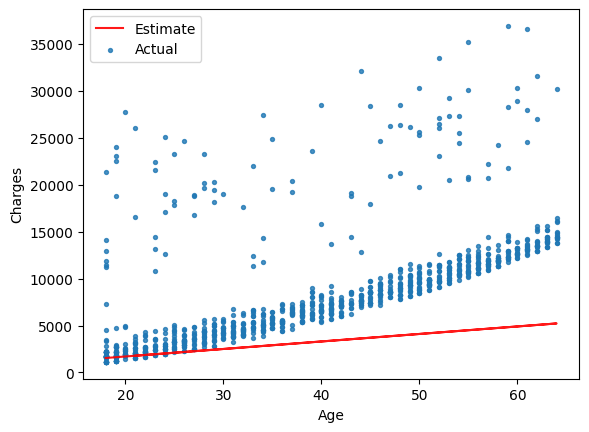

In [30]:
try_parameters(non_smoker_df, 80, 100)

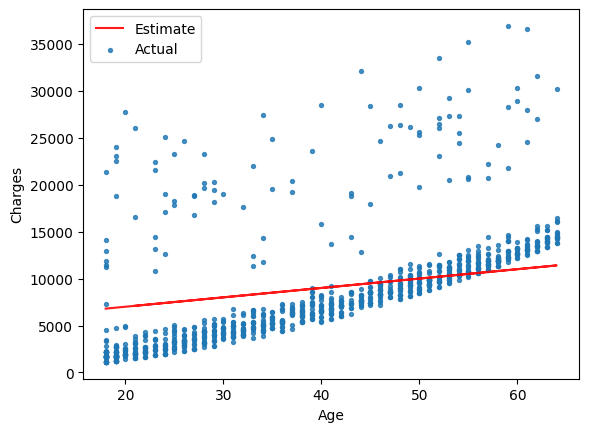

In [42]:
try_parameters(non_smoker_df, 100, 5000)

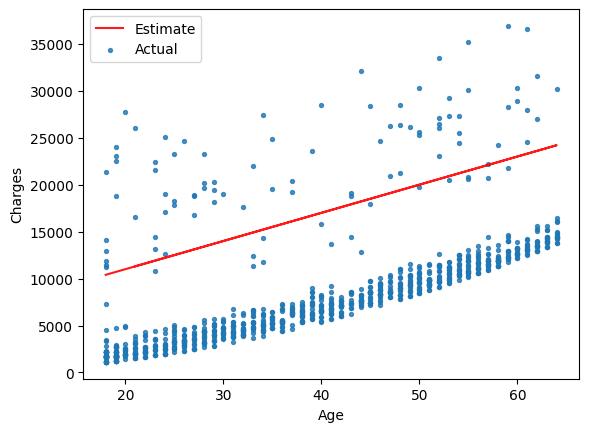

In [31]:
try_parameters(non_smoker_df, 300, 5000)

- Параметри 80 і 100 не найкращі коефіцієнти для прямої
- Параметри 100 і 5000 вже краще описують дані
- Параметри 300 і 5000 найбільш точно описують викиди

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [43]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [44]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, 80, 100)

In [45]:
rmse(targets, predicted)

7453.509265201121

In [46]:
predicted_2 = estimate_charges(non_smoker_df.age, 100, 5000)

In [47]:
rmse(targets, predicted_2)

5247.485446055352

In [50]:
predicted_3 = estimate_charges(non_smoker_df.age, 300, 5000)

In [51]:
rmse(targets, predicted_3)

9601.992249808254

In [53]:
df.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

Висновок: отже, з 3 випробовуваних варіантів найменший лос при параметрах 100 і 5000. Отже лінія з такими параметрами найкраще описує розподіл даних з запропонованих 3 варіантів. Але медіана= 13270, loss=5247. Отже, існують такі парамери w i b, які є ще кращими ніж 100 і 5000, так як loss завеликий